<a href="https://colab.research.google.com/github/JK-the-Ko/Thermo_Fluid_Dynamics_Experiment/blob/main/2021_2/%EC%97%B4%EC%9C%A0%EC%B2%B4%EA%B3%B5%ED%95%99%EC%8B%A4%ED%97%98_Week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Pixel in 8Bit Image**

In [ ]:
pixel_list = list()

In [ ]:
patch = np.ones((8, 8), dtype = "uint8")

for pixel in range(256) :
  pixel_list.append(patch * pixel)

In [ ]:
pixel_range = np.hstack(tuple(pixel_list))

In [ ]:
plt.rcParams["figure.figsize"] = (15, 15)
plt.imshow(pixel_range, cmap = "gray")
plt.axis("off")
plt.show()

**Load Image**

In [ ]:
image = cv2.imread("/content/lenna.png")

In [ ]:
image.dtype

In [ ]:
image.shape

In [ ]:
image

Image Color Channel as BGR (Blue - Green - Red)

In [ ]:
plt.rcParams["figure.figsize"] = (5, 5)

In [ ]:
plt.imshow(image)
plt.show()

Convert BGR into RGB (Red - Green - Blue)

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(image)
plt.show()

Convert RGB to Grayscale

In [ ]:
image_grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [ ]:
image_grayscale.shape

In [ ]:
plt.imshow(image_grayscale, cmap = "gray")
plt.show()

**RGB Channel Division**

In [ ]:
image.shape

In [ ]:
r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]

In [ ]:
r.shape

In [ ]:
rows, cols = 1, 3

fig = plt.figure(figsize = (50, 50))

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(r, cmap = "gray")
ax1.set_title("Red Channel")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(g, cmap = "gray")
ax2.set_title("Green Channel")

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(b, cmap = "gray")
ax3.set_title("Blue Channel")

plt.show()

**2 Channel v.s 3 Channel**

In [ ]:
print(image_grayscale.shape)
print(image.shape)

Dimension Expansion

In [ ]:
image_grayscale_expanded = np.expand_dims(image_grayscale, 2)

In [ ]:
image_grayscale_expanded.shape

Concatenation Along Z Axis

In [ ]:
image_grayscale_concat = np.concatenate((image_grayscale_expanded, image_grayscale_expanded, image_grayscale_expanded), axis = 2)

In [ ]:
image_grayscale_concat.shape

In [ ]:
plt.imshow(image_grayscale_concat)
plt.show()

**Save Image**

In [ ]:
cv2.imwrite("/content/lenna_grayscale.png", image_grayscale)

**Crop Image**

"Image Cropping == Array Slicing"

In [ ]:
image_crop = image[:100, :100, :]

In [ ]:
plt.imshow(image_crop)
plt.show()

* Center Crop

In [ ]:
height, width, channel = image.shape
center_y, center_x = height // 2, width // 2

In [ ]:
delta = 50

In [ ]:
image_crop = image[center_y - delta : center_y + delta, center_x - delta : center_x + delta, :]

In [ ]:
plt.imshow(image_crop)
plt.show()

**Rotation**

In [ ]:
height, width = image_grayscale.shape

In [ ]:
center_y, center_x = height // 2, width // 2

In [ ]:
degree, scale = 90, 1

In [ ]:
matrix = cv2.getRotationMatrix2D((center_x, center_y), degree, scale)

In [ ]:
matrix

In [ ]:
image_grayscale_rotated = cv2.warpAffine(image_grayscale, matrix, (height, width))

In [ ]:
rows, cols = 1, 2

fig = plt.figure(figsize = (10, 10))

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image_grayscale, cmap = "gray")
ax1.set_title("Original Image")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(image_grayscale_rotated, cmap = "gray")
ax2.set_title("Rotated Image")

plt.show()

**Resize Image**

Linear Interpolation
*   Nearest Neighborhood
*   Bilinear
*   Bicubic




**Downsampling**



In [ ]:
height, width, channel = image.shape

In [ ]:
nn = cv2.resize(image, (width // 2, height // 2), interpolation = cv2.INTER_NEAREST)

In [ ]:
nn.shape

In [ ]:
bil = cv2.resize(image, (width // 2, height // 2), interpolation = cv2.INTER_LINEAR)

In [ ]:
bic = cv2.resize(image, (width // 2, height // 2), interpolation = cv2.INTER_CUBIC)

In [ ]:
rows, cols = 1, 3

fig = plt.figure(figsize = (50, 50))

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(nn)
ax1.set_title("Nearest Neighborhood")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(bil)
ax2.set_title("Bilinear")

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(bic)
ax3.set_title("Bicubic")

plt.show()

**Upsampling**

In [ ]:
nn = cv2.resize(image, (width * 2, height * 2), interpolation = cv2.INTER_NEAREST)
bil = cv2.resize(image, (width * 2, height * 2), interpolation = cv2.INTER_LINEAR)
bic = cv2.resize(image, (width * 2, height * 2), interpolation = cv2.INTER_CUBIC)

In [ ]:
nn.shape

In [ ]:
rows, cols = 1, 3

fig = plt.figure(figsize = (50, 50))

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(nn)
ax1.set_title("Nearest Neighborhood")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(bil)
ax2.set_title("Bilinear")

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(bic)
ax3.set_title("Bicubic")

plt.show()

**Pixel Histogram**

In [ ]:
plt.imshow(image_grayscale, cmap = "gray")
plt.show()

In [ ]:
plt.hist(image_grayscale.ravel(), 256, [0, 256])
plt.show()

**Histogram Equalization**

In [ ]:
image_grayscale_enhanced = cv2.equalizeHist(image_grayscale)

In [ ]:
plt.hist(image_grayscale.ravel(), 256, [0, 256], label = "Original", color = "green")
plt.hist(image_grayscale_enhanced.ravel(), 256, [0, 256], label = "Equalization", color = "orange")
plt.legend()
plt.show()

In [ ]:
rows, cols = 1, 2

fig = plt.figure(figsize = (25, 25))

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image_grayscale, cmap = "gray")
ax1.set_title("Original Image")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(image_grayscale_enhanced, cmap = "gray")
ax2.set_title("Equalized Image")

plt.show()

**Addictive White Gaussian Noise**

In [ ]:
mean, std = 0, 15

In [ ]:
z = np.random.normal(mean, std, image_grayscale.shape)

In [ ]:
z.shape

In [ ]:
image_noisy = image_grayscale + z

In [ ]:
image_noisy.dtype

In [ ]:
image_noisy = image_noisy.astype("uint8")

In [ ]:
rows, cols = 1, 2

fig = plt.figure(figsize = (25, 25))

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image_grayscale, cmap = "gray")
ax1.set_title("Clean Image")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(image_noisy, cmap = "gray")
ax2.set_title("Noisy Image")

plt.show()

**Convolution**

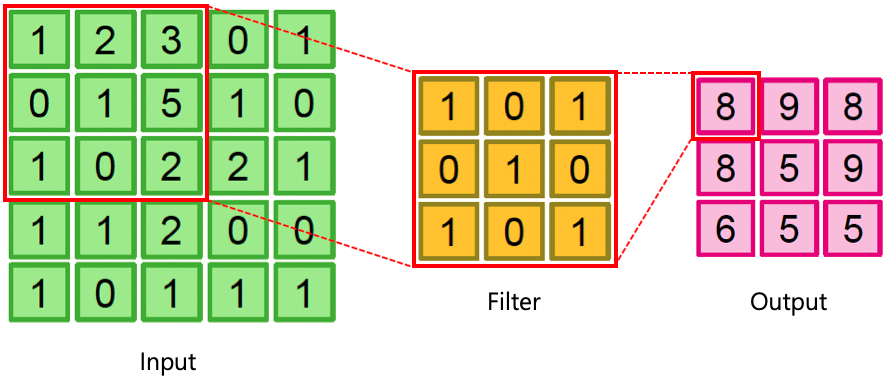

Link: https://blog-st.tistory.com/entry/ML-DL-Convolution

In [ ]:
kernel = np.array([[0, 0, 0], [0, 1.5, 0], [0, 0, 0]])

In [ ]:
image_conv = cv2.filter2D(image_grayscale, -1, kernel)

In [ ]:
plt.imshow(image_conv, cmap = "gray")
plt.show()

**Low Pass Filtering (Denoising)**

In [ ]:
kernel_size = 5

In [ ]:
kernel = np.ones((kernel_size, kernel_size)) / np.power(kernel_size, 2)
image_denoised = cv2.filter2D(image_noisy, -1, kernel)

In [ ]:
rows, cols = 1, 3

fig = plt.figure(figsize = (25, 25))

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image_grayscale, cmap = "gray")
ax1.set_title("Clean Image")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(image_noisy, cmap = "gray")
ax2.set_title("Noisy Image")

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(image_denoised, cmap = "gray")
ax3.set_title("Denoised Image")

plt.show()

**High Pass Filtering (Sharpening)**

In [ ]:
kernel = np.array([[0, -1/4, 0], [-1/4, 2, -1/4], [0, -1/4, 0]])
image_sharpened = cv2.filter2D(image_grayscale, -1, kernel)

In [ ]:
rows, cols = 1, 2

fig = plt.figure(figsize = (25, 25))

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image_grayscale, cmap = "gray")
ax1.set_title("Clean Image")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(image_sharpened, cmap = "gray")
ax2.set_title("Sharpened Image")

plt.show()

In [ ]:
kernel = np.array([[0, -1/4, 0], [-1/4, 2, -1/4], [0, -1/4, 0]])
image_sharpened = cv2.filter2D(image_noisy, -1, kernel)

In [ ]:
rows, cols = 1, 2

fig = plt.figure(figsize = (25, 25))

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image_noisy, cmap = "gray")
ax1.set_title("Noisy Image")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(image_sharpened, cmap = "gray")
ax2.set_title("Sharpened Noisy Image")

plt.show()

**Edge Detection**

* Sobel Edge Detector

In [ ]:
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

In [ ]:
image_edge_x = cv2.filter2D(image_noisy, -1, kernel_x)
image_edge_y = cv2.filter2D(image_noisy, -1, kernel_y)

In [ ]:
rows, cols = 1, 3

fig = plt.figure(figsize = (25, 25))

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image_grayscale, cmap = "gray")
ax1.set_title("Original Image")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(image_edge_x, cmap = "gray")
ax2.set_title("Edge Filtered Image (X)")

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(image_edge_y, cmap = "gray")
ax3.set_title("Edge Filtered Image (Y)")

plt.show()

In [ ]:
image_edge = np.sqrt(np.power(image_edge_x, 2) + np.power(image_edge_y, 2)).astype("uint8")

**Week 10 Assignment**

openCV 라이브러리를 이용하여 하단과 동일한 이미지 처리를 진행하세요.

1. lenna.png 불러오기
2. RGB 채널로 변환
3. RGB 채널 분리
4. 각 채널에 Histogram Equalization 적용
5. 각 채널 Concatenation
6. RGB 채널로 복원 
7. 기존 이미지 및 전처리 이미지 동시 출력 및 비교

**하단과 같은 파일명으로 ipynb 생성 후 과제 진행 및 제출**

* 파일명
  * 학번_수강생성함_Week_10.ipynb
  * 예시) 2021345678_홍길동_Week_10.ipynb